# Analyse Burst Test Data

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [3]:
file=open('C:/Users/Inance/Documents/Thesis/BURST/Burst_Testing_Data_Analysis/Day_1_Testing/Burst/Changed_TXT/Sample_15_burst_TXT.txt')
lst = [] 
for line in file:
    lst.append([ float(x) for x in line.split()])
time = np.array([ x[0] for x in lst]) #first row in file and make array
void = np.array([ x[1] for x in lst]) #second row in file and make array
pressure0 =np.array([ x[2] for x in lst]) #third row in file and make array
pressure=pressure0*-1 #change the sign of the imported pressure data
while pressure 
#print(' time = ',time,'\n\n','void = ',void,'\n\n\n','pressure = ',pressure)

### Create Graph

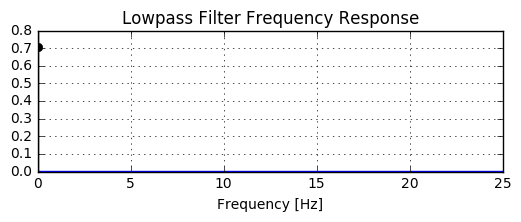

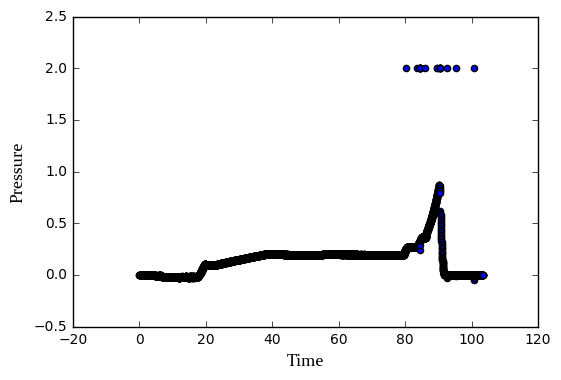

In [4]:
pressure_max = 2 #edit y-axis max
fig, ax = plt.subplots(1)
ax.scatter(time, np.minimum(pressure, pressure_max)) #create a scatter plot
axis_font = {'fontname':'Constantia', 'size':'12'} #customize graph
plt.ylabel("Pressure",**axis_font),plt.xlabel("Time",**axis_font) #name axes
plt.show() #show graph

## Low Pass Filter

In [8]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 50       # sample rate, Hz
cutoff = 0.0111 #3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 103.42000       # seconds, according to the sample imported
n = int(T * fs) # total number of samples
#t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
t=time
data = pressure


# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()
print(data)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

In [ ]:
pressure_max = 2 #edit y-axis max
fig, ax = plt.subplots(1)
ax.scatter(t, y) #create a scatter plot
axis_font = {'fontname':'Constantia', 'size':'12'} #customize graph
plt.ylabel("Pressure",**axis_font),plt.xlabel("Time",**axis_font) #name axes
plt.show() #show graph